<h1><center>Hierarchical Clustering</center></h1>

In this notebook, we will use Agglomerative Hierarchical Clustering technique (the bottom up approach) and the Complete Linkage as the Linkage Criteria. 

Linkage Criteria:
- Complete Linkage as the Linkage Criteria: finding the longest distance between the points in each cluster
- Average Linkage: finding the average distance of each point from one cluster to every point in another cluster
- Single linkage: finding the shortest distance between two points in each cluster

In this notebook we practice clustering with 2 examples:
- clustering with a random generated dataset
- clustering on vehicle dataset

We'll also also use a knn method to predict value for a new car based on our Hierarchical Clustering results.

In [1]:
# import libs
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<hr>
<h3 id="generating_data">Generating Random Data</h3>
We will be generating a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.


In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

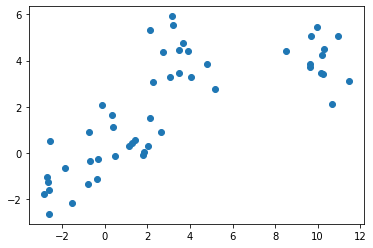

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

<hr>
<h3 id="agglomerative_clustering">Agglomerative Clustering</h3>
We will start by clustering the random data points we just created.


The <b> Agglomerative Clustering </b> class will require two inputs:

<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>


In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

# Fit the model with X and y from the generated data above.
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4,
                        pooling_func='deprecated')

####  Show the clustering

In [5]:
def plotMyData(X,y,algo):
    # Create a figure of size 6 inches by 4 inches.
    plt.figure(figsize=(6,4))

    # These two lines of code are used to scale the data points down,
    # Or else the data points will be scattered very far apart.

    # Create a minimum and maximum range of X1.
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

    # Get the average distance for X1.
    X = (X - x_min) / (x_max - x_min)

    # This loop displays all of the datapoints.
    for i in range(X.shape[0]):
        # Replace the data points with their respective cluster value 
        # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(algo.labels_[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    # Remove the x ticks, y ticks, x and y axis
    plt.xticks([])
    plt.yticks([])
    #plt.axis('off')



    # Display the plot of the original data before clustering
    plt.scatter(X[:, 0], X[:, 1], marker='.')
    # Display the plot
    plt.show()

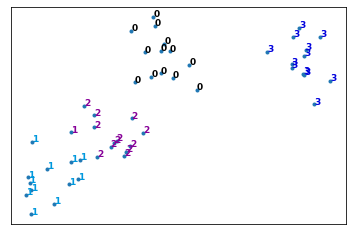

In [6]:
plotMyData(X1,y1,agglom)

<h3 id="dendrogram">Dendrogram Associated for the Agglomerative Hierarchical Clustering</h3>
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X1 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)


In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[ 0.          0.88804949  6.8883041  ... 10.8521361   6.79737053
  13.46074711]
 [ 0.88804949  0.          7.65902918 ... 11.71285375  7.50130924
  14.28336696]
 [ 6.8883041   7.65902918  0.         ...  4.69666355  0.98468811
   6.73425436]
 ...
 [10.8521361  11.71285375  4.69666355 ...  0.          5.49841507
   3.10783518]
 [ 6.79737053  7.50130924  0.98468811 ...  5.49841507  0.
   7.23574808]
 [13.46074711 14.28336696  6.73425436 ...  3.10783518  7.23574808
   0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:

<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>


In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\ProgramData\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:

<ul> <li> Z </li> </ul>


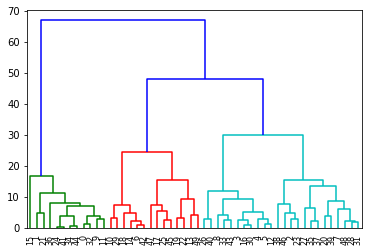

In [9]:
dendro = hierarchy.dendrogram(Z)

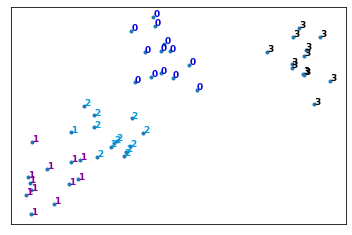

In [10]:
# use average linkage
agglom2 = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom2.fit(X1,y1)
plotMyData(X1,y1,agglom2)

C:\ProgramData\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


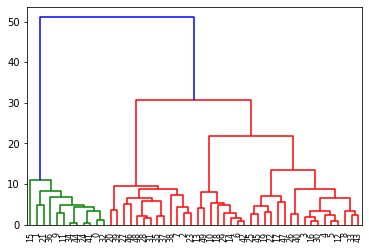

In [11]:
Z2 = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z2)

<hr>
<h1 id="clustering_vehicle_dataset">Clustering on Vehicle dataset</h1>

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

We'll use 2 clustering methods :
- scipy: a collection of numerical algorithms. SciPy is a good library for scientific and high performance computation.
- scikit learn: a collection of algorithms and tools for machine learning

However we'll discuss the results only with scikit.

Lets download the dataset from IBM Object Storage:
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cars_clus.csv


In [12]:
# Read data
filename = 'cars_clus.csv'
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


manufact    model   sales  resale   type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000  101.200   
1    Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000  108.100   
2    Acura       CL  14.114  18.225  0.000  $null$    3.200  225.000  106.900   
3    Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000  114.600   
4     Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000  102.600   

    width   length curb_wgt fuel_cap     mpg lnsales  partition  
0  67.300  172.400    2.639   13.200  28.000   2.828        0.0  
1  70.300  192.900    3.517   17.200  25.000   3.673        0.0  
2  70.600  192.000    3.470   17.200  26.000   2.647        0.0  
3  71.400  196.600    3.850   18.000  22.000   2.150        0.0  
4  68.200  178.000    2.998   16.400  27.000   3.015        0.0

The feature sets include price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

## Data Preprocessing

<h3 id="data_cleaning">Data Cleaning</h3>
lets simply clear the dataset by dropping the rows that have null value:


In [13]:
#  find the number of NaN in each column before processing
pdf.isna().sum().sum()

2

In [14]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
print("Number of NaN after processing", pdf.isna().sum().sum())
pdf.head(5)


Shape of dataset before cleaning:  2544
Number of NaN after processing 59


manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       CL  14.114  18.225   0.0    NaN       3.2     225.0   
3    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
4     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
2     106.9   70.6   192.0     3.470      17.2  26.0    2.647        0.0  
3     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
4     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0

In [15]:
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset after cleaning:  1872


manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0

### Feature selection

Lets select our feature set:


In [16]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalization

Now we can normalize the feature set. **MinMaxScaler** transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.


In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x = featureset.values # returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Clustering using Scipy
In this part we use Scipy package to cluster the dataset: First, we calculate the distance matrix. 

In [18]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:

```
- single
- complete
- average
- weighted
- centroid
```

We use **complete** for our case, but feel free to change it to see how the results change.


In [19]:
Z = hierarchy.linkage(D, 'complete')

C:\ProgramData\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.
So you can use a cutting line:


In [20]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [21]:
pdf['cluster1_'] = clusters
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

   cluster1_  
0          1  
1          5  
2          5  
3          6  
4          5

Also, we can determine the number of clusters directly:


In [22]:
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

In [23]:
pdf['cluster2_'] = clusters
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

   cluster1_  cluster2_  
0          1          1  
1          5          3  
2          5          3  
3          6          3  
4          5          3

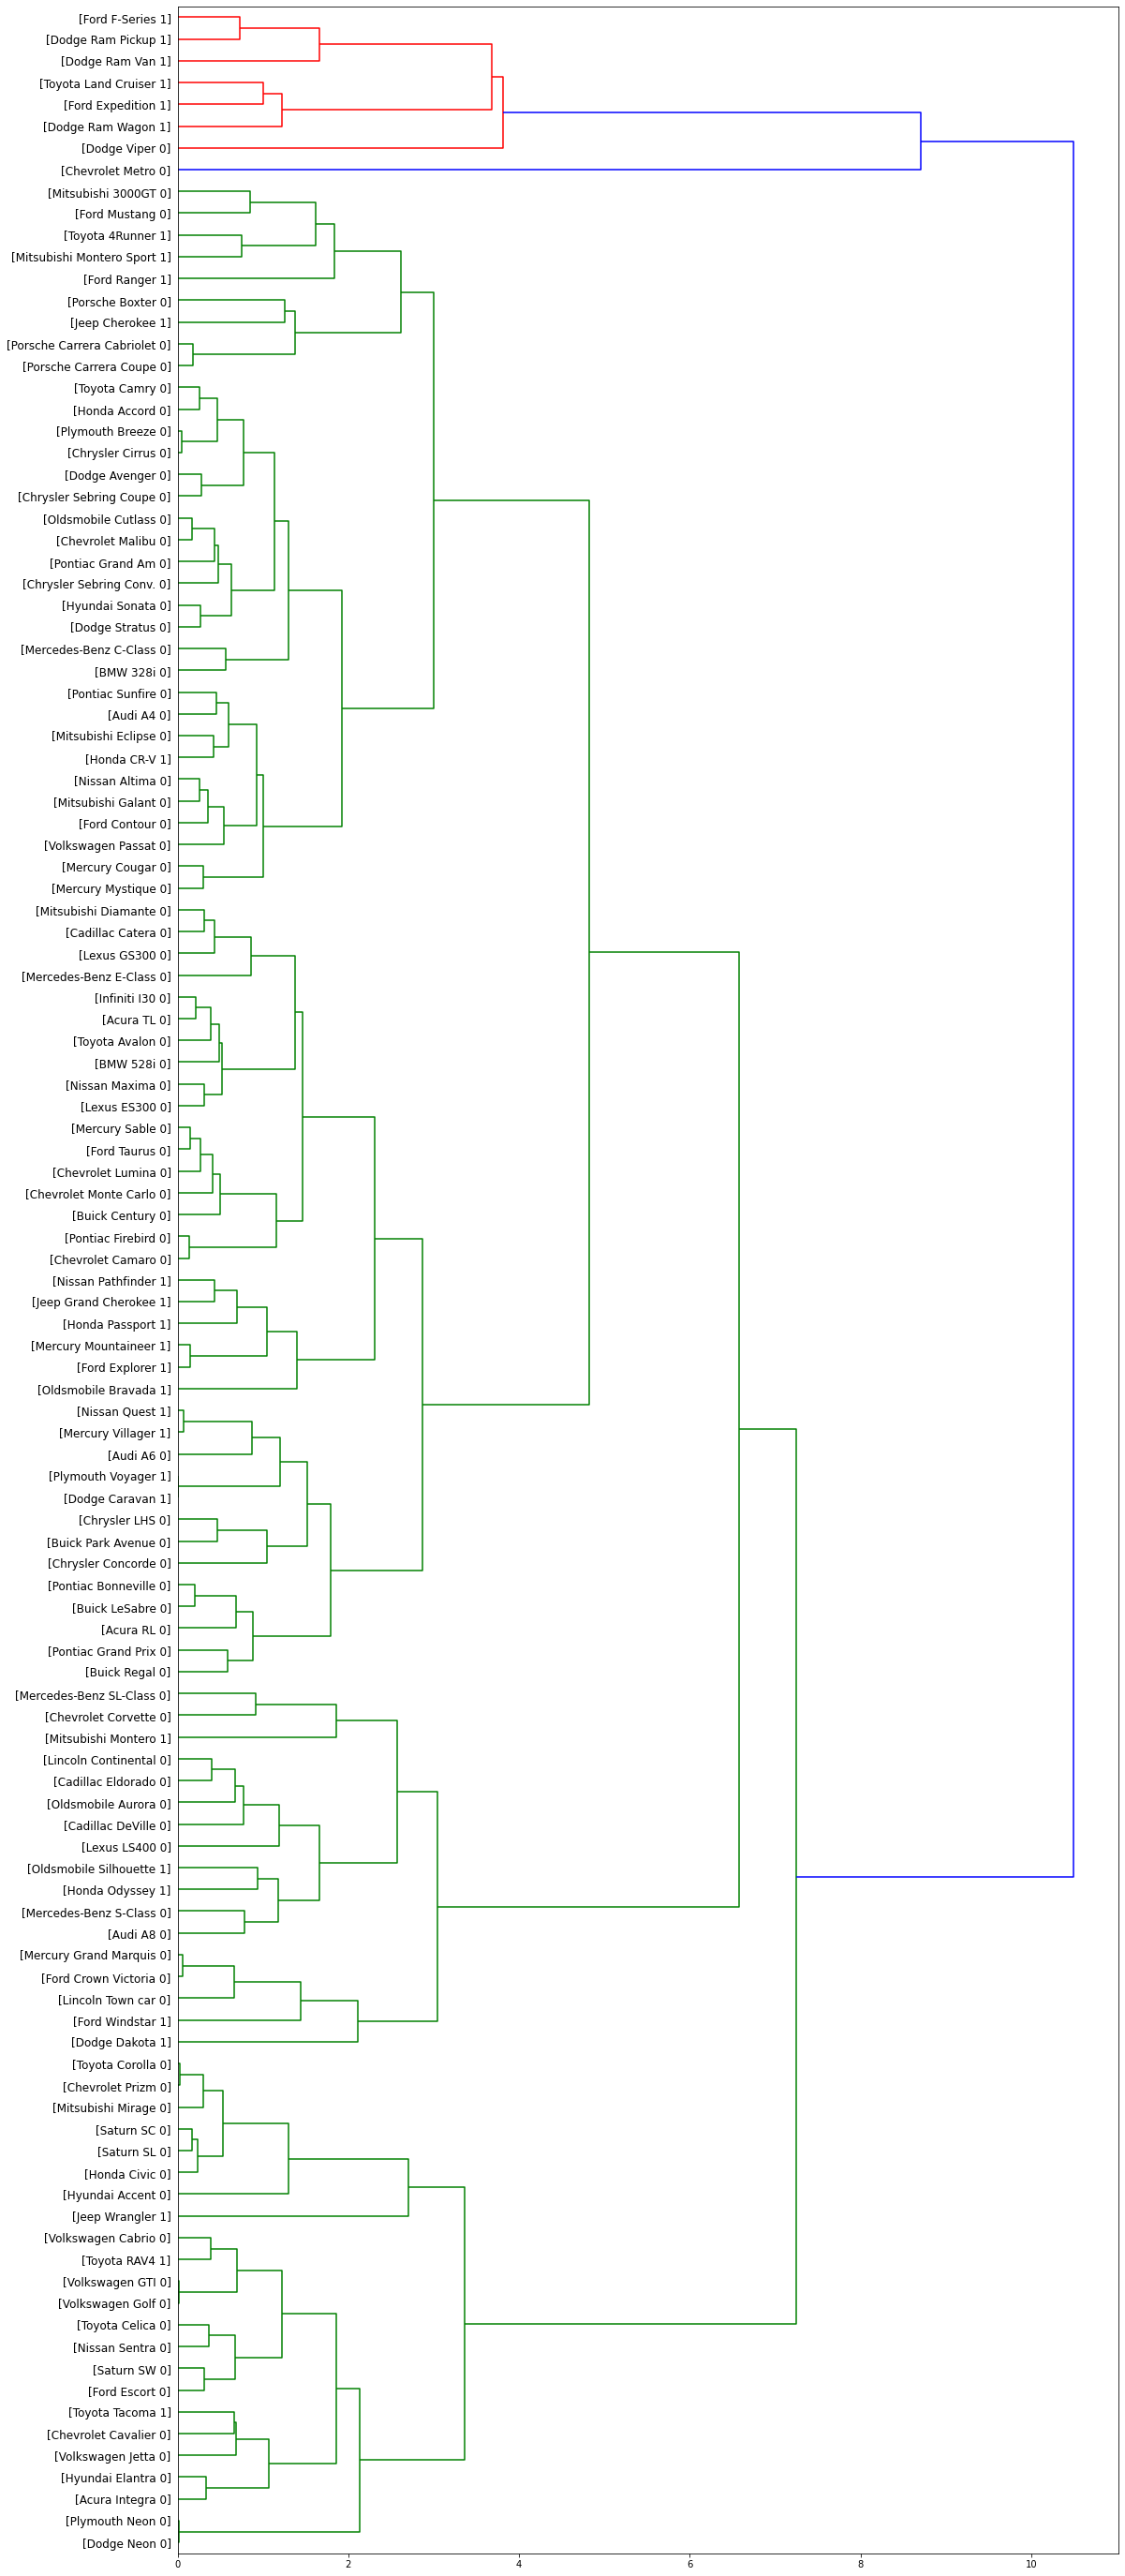

In [24]:
# Plot the dendrogram:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Determine the number of clusters

A huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters. Doing it manually allows us to gain some insights into our data and to perform some sanity checks on the edge cases.

In our case we'd probably just that our cut-off is 5. Therefore we have n_cluster = 6

We can use other methods to do this task. 

See for more details:
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Retrieve-the-Clusters

<h2 id="clustering_using_skl">Clustering using scikit-learn</h2>
Lets redo it again, but this time using scikit-learn package:


In [25]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

-   Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
-   Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
-   Average linkage minimizes the average of the distances between all observations of pairs of clusters.


In [26]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1], dtype=int64)

And, we can add a new field to our dataframe to show the cluster of each row:


In [27]:
pdf['cluster3_'] = agglom.labels_
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

   cluster1_  cluster2_  cluster3_  
0          1          1          1  
1          5          3          2  
2          5          3          2  
3          6          3          1  
4          5          3          2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

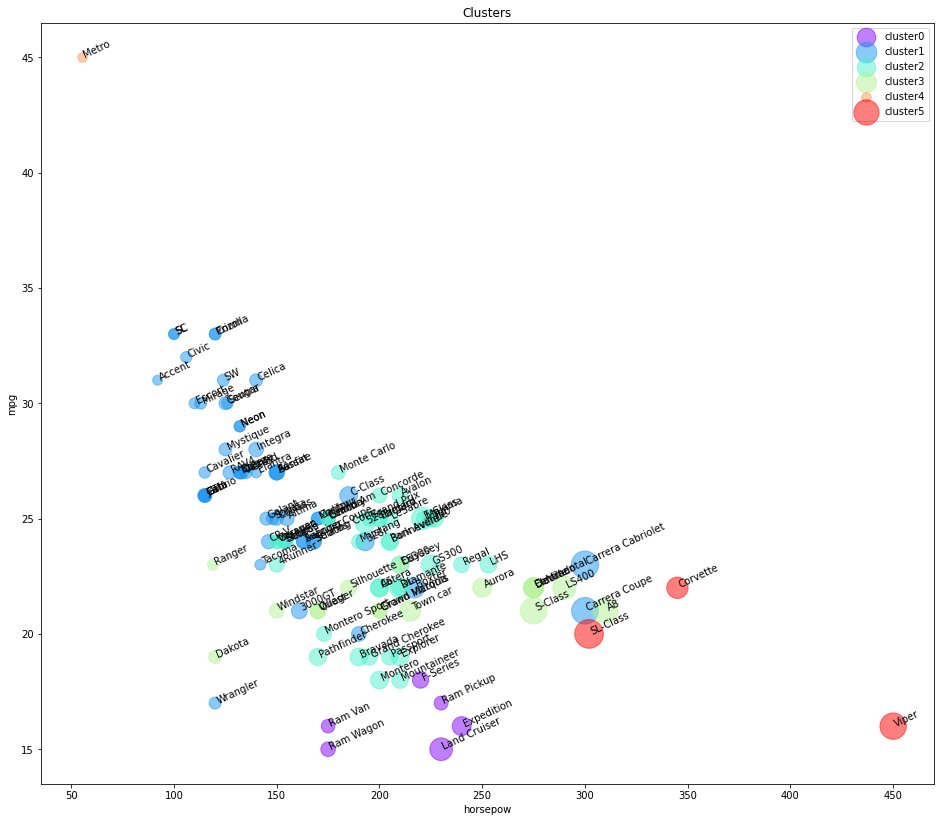

In [28]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster3_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 0 in the type column). So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:


In [29]:
pdf.groupby(['cluster3_','type'])['cluster3_'].count()

cluster3_  type
0          1.0      6
1          0.0     47
           1.0      5
2          0.0     27
           1.0     11
3          0.0     10
           1.0      7
4          0.0      1
5          0.0      3
Name: cluster3_, dtype: int64

Now we can look at the characteristics of each cluster:

In [30]:
agg_cars = pdf.groupby(['cluster3_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster3_ type                                            
0         1.0   211.666667  4.483333  16.166667  29.024667
1         0.0   146.531915  2.246809  27.021277  20.306128
          1.0   145.000000  2.580000  22.200000  17.009200
2         0.0   203.111111  3.303704  24.214815  27.750593
          1.0   182.090909  3.345455  20.181818  26.265364
3         0.0   256.500000  4.410000  21.500000  42.870400
          1.0   160.571429  3.071429  21.428571  21.527714
4         0.0    55.000000  1.000000  45.000000   9.235000
5         0.0   365.666667  6.233333  19.333333  66.010000

It is obvious that we have 3 main clusters with the majority of vehicles in those.

**Cars**:

-   Cluster 1: with almost high mpg, and low in horsepower.
-   Cluster 2: with good mpg and horsepower, but higher price than average.
-   Cluster 3: with low mpg, high horsepower, highest price.

**Trucks**:

-   Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
-   Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
-   Cluster 3: with good mpg and horsepower, low price.

Please notice that we did not use **type** , and **price** of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

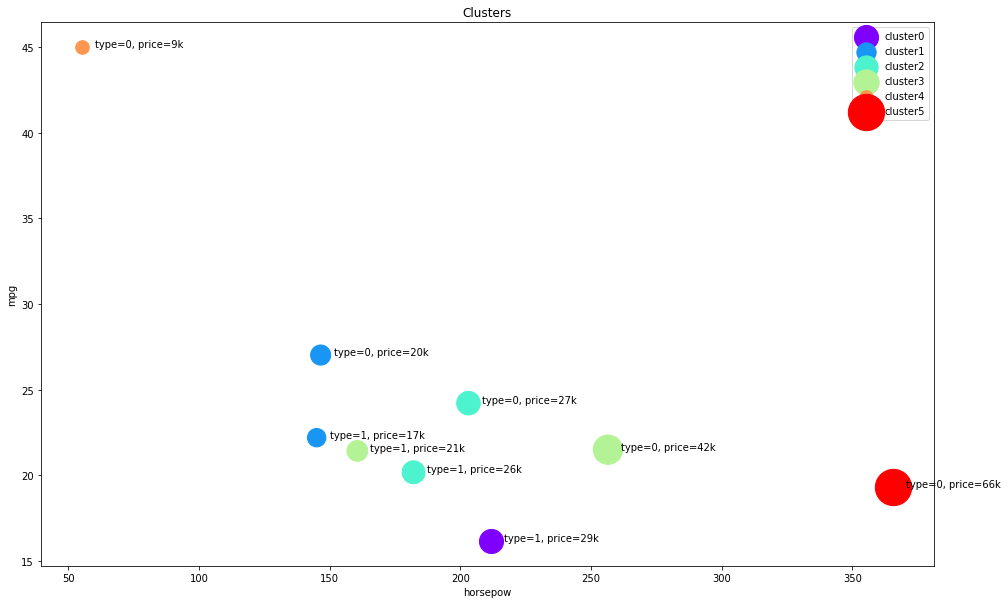

In [31]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


## Predict for a new car

We"ll use the original data and the assigned clusters along with a **knn classifier** to make prediction.

As we used a hierarchical techniques we had to cut the tree to obtain flat clusters.
We can now use the "label" assignment to run a classifier on top. 
However note doing that comes baked with a lot of assumptions, so we need to make sure our data understanding is very good. We need to validate any clusters with non-technical users that have deep domain experience.

More details on this methodology on https://datascience.stackexchange.com/questions/26183/clustering-data-to-learned-cluster

In [32]:
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828        0.0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673        0.0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150        0.0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015        0.0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933        0.0   

   cluster1_  cluster2_  cluster3_  
0          1          1          1  
1          5          3          2  
2          5          3          2  
3          6          3          1  
4          5          3          2

In [33]:
# how many of each class is in our data set
pdf['cluster3_'].value_counts()

1    52
2    38
3    17
0     6
5     3
4     1
Name: cluster3_, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D1ED860>]],
      dtype=object)

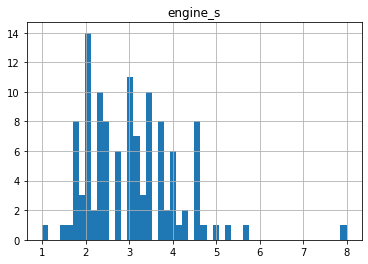

In [34]:
# explore your data by using visualization techniques
pdf.hist(column='engine_s', bins=50)

We'll use the original data and the assigned clusters along with a **knn classifier**

### Preprocessing data

In [35]:
X_featureset=pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg','cluster3_']]
X_featureset.head()

engine_s  horsepow  wheelbas  width  length  curb_wgt  fuel_cap   mpg  \
0       1.8     140.0     101.2   67.3   172.4     2.639      13.2  28.0   
1       3.2     225.0     108.1   70.3   192.9     3.517      17.2  25.0   
2       3.5     210.0     114.6   71.4   196.6     3.850      18.0  22.0   
3       1.8     150.0     102.6   68.2   178.0     2.998      16.4  27.0   
4       2.8     200.0     108.7   76.1   192.0     3.561      18.5  22.0   

   cluster3_  
0          1  
1          2  
2          2  
3          1  
4          2

In [36]:
y_featureset=pdf['cluster3_']
y_featureset.head()

0    1
1    2
2    2
3    1
4    2
Name: cluster3_, dtype: int64

In [37]:
X=X_featureset.values # returns a numpy array
# Normalize
scaler = StandardScaler().fit(X)
X_norm=scaler.transform(X.astype(float))
y=y_featureset.values
print(X[0:2,:])
print(X_norm[0:2,:])
print(y[0:2])

[[  1.8   140.    101.2    67.3   172.4     2.639  13.2    28.      1.   ]
 [  3.2   225.    108.1    70.3   192.9     3.517  17.2    25.      2.   ]]
[[-1.18851919 -0.70760105 -0.76427293 -1.10660259 -1.11075197 -1.15208399
  -1.2208532   0.88524147 -0.70469426]
 [ 0.14398898  0.74935391  0.09649372 -0.25312531  0.37576661  0.32449122
  -0.16219228  0.20113809  0.31319745]]
[1 2]


### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81, 9) (81,)
Test set: (36, 9) (36,)


### Algorithm setup

In [39]:
## Import library : Classifier implementing the k-nearest neighbors vote
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [40]:
# Best choice of K
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.91666667, 0.91666667, 0.91666667, 0.88888889, 0.88888889,
       0.83333333, 0.83333333, 0.80555556, 0.88888889, 0.72222222,
       0.75      , 0.72222222, 0.77777778, 0.66666667])

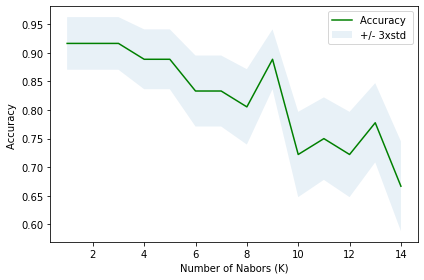

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [42]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9166666666666666 with k= 1


### Model fitting

In [43]:
# Training  with k = 1
k = 1

# Train Model  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Predicting with our  model the test set
yhat = neigh.predict(X_test)

# Evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9166666666666666


### New car
A new car is on the market. Predict in wich cluster it will fall

In [44]:
newCar=np.array([[2.8  , 210.   , 120.2  ,  59.3  , 201.4  ,   3.639,  16.2  ,
        22.   ,   1.   ]])
sampleNorm=scaler.transform(newCar)
print(sampleNorm)

[[-0.23672764  0.49224421  1.60595409 -3.38254201  0.99212798  0.52966455
  -0.42685751 -0.4829653  -0.70469426]]


In [45]:
y_predict = neigh.predict(sampleNorm)
y_predict

array([2], dtype=int64)

Therefore, this car belongs to cluster 2:
- good mpg
- good power

We can also predict that its price should be higher than average.